<a href="https://colab.research.google.com/github/vsemwal/Deep_Learning_MANIT/blob/master/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Local copy of the dataset file: /root/.keras/datasets/iris_training.csv
Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species
OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([5. , 5.1, 4.4, 4.9, 5.6, 5. , 6.3, 6.3, 4.9, 6.7, 6.5, 5.2, 5.1,
       5.4, 6.2, 5.4, 6.8, 6.6, 5.8, 4.6, 5.7, 6.3, 7.7, 6.3, 6.9, 5.7,
       5.7, 5.1, 6.7, 6.9, 5. , 7.7], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3.2, 2.5, 3. , 3. , 2.9, 3. , 2.3, 2.7, 3.1, 3.1, 3. , 3.4, 3.8,
       3.4, 2.8, 3.9, 3.2, 2.9, 2.7, 3.4, 2.9, 2.5, 2.8, 3.3, 3.2, 2.8,
       4.4, 3.7, 3.3, 3.1, 2.3, 3.8], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.2, 3. , 1.3, 1.4, 3.6, 1.6, 4.4, 4.9, 1.5, 5.6, 5.8, 1.4, 1.6,
       1.5, 4.8, 1.3, 5.9, 4.6, 5.1, 1.4, 4.2, 5. , 6.7, 4.7, 5.7, 4.1,
       1.5, 1.5, 5.7, 5.1, 3.3, 6.7], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(3

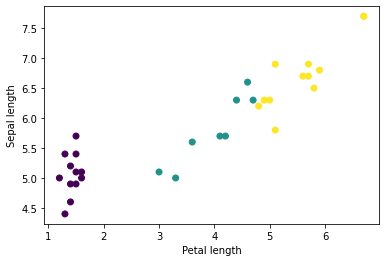

tf.Tensor(
[[6.1 3.  4.9 1.8]
 [5.5 2.6 4.4 1.2]
 [5.  3.  1.6 0.2]
 [5.2 3.4 1.4 0.2]
 [4.9 3.  1.4 0.2]], shape=(5, 4), dtype=float32)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Prediction: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
    Labels: [2 1 0 0 0 1 0 2 0 0 1 2 0 2 1 2 0 0 0 0 1 2 0 1 2 2 0 2 0 1 1 2]


In [0]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)
features, labels = next(iter(train_dataset))
print(features)
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()
def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels
train_dataset = train_dataset.map(pack_features_vector)
features, labels = next(iter(train_dataset))

print(features[:5])
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])
model.summary();
predictions = model(features)
predictions[:5]
tf.nn.softmax(predictions[:5])
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

In [0]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

In [0]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

# training=False is needed only if there are layers with different
# behavior during training versus inference (e.g. Dropout).
predictions = model(predict_dataset, training=False)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris virginica (99.7%)
Example 1 prediction: Iris virginica (99.9%)
Example 2 prediction: Iris virginica (100.0%)


In [0]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step
Test set accuracy: 26.667%


In [0]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [0]:
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))

Loss test: 1.6443825960159302


In [0]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [0]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [0]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))

Step: 0, Initial Loss: 1.6443825960159302
Step: 1,         Loss: 1.4676586389541626
